Data set: NYC taxi timings + NYC weather report

Business Questions:
/change the questios into objectives
1)	Tool- How does the average travel duration affect by amount of precipitation? 
2)	Tool- How does the average travel distance affect by the amount of precipitation? 
3)	Tool- How is the trip duration affected by average temperatures? 
4)	Decision making- What is the ideal distance of travel to maximize the number of passengers per hour in rush hour? 
The decision will take its place while optimizing the number of taxis during the rush hours. The dision maker could be the general manager of the taxi station.

Measurable Target:
1. 

In [1]:
import pandas as pd
import numpy as np
import IPython.display as display
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.model_selection import train_test_split   # This is to prepare the data for the model
from sklearn.tree import DecisionTreeClassifier 

In [2]:
raw_df=pd.read_csv('../taxi/refined_data.csv',index_col='Unnamed: 0')
raw_df.head()

,year,month,date,hour,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,avg_temp,snow_depth,snow_fall,precipitate,distance
0,2016,3,2016-03-14,17,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,45.5,0.0,0.0,0.29,17.679539
1,2016,6,2016-06-12,0,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,72.5,0.0,0.0,0.0,20.455904
2,2016,4,2016-04-06,19,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,39.0,0.0,0.0,0.0,13.438206
3,2016,3,2016-03-26,13,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,46.5,0.0,0.0,0.0,10.689569
4,2016,1,2016-01-30,22,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,33.5,6.0,0.0,0.0,11.572403


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 945 entries, 0 to 944
Data columns (total 20 columns):
year                  945 non-null int64
month                 945 non-null int64
date                  945 non-null object
hour                  945 non-null int64
id                    945 non-null object
vendor_id             945 non-null int64
pickup_datetime       945 non-null object
dropoff_datetime      945 non-null object
passenger_count       945 non-null int64
pickup_longitude      945 non-null float64
pickup_latitude       945 non-null float64
dropoff_longitude     945 non-null float64
dropoff_latitude      945 non-null float64
store_and_fwd_flag    945 non-null object
trip_duration         945 non-null int64
avg_temp              945 non-null float64
snow_depth            945 non-null object
snow_fall             945 non-null object
precipitate           945 non-null object
distance              945 non-null float64
dtypes: float64(6), int64(6), object(8)
memory usage: 1

In [4]:
raw_df.describe()

,year,month,hour,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,avg_temp,distance
count,945.0,945.000000,945.00000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,2016.0,3.576720,13.70582,1.531217,1.670899,-73.975549,40.752032,-73.973671,40.753067,729.409524,51.726984,29.270983
std,0.0,1.707625,6.37778,0.499289,1.298895,0.032671,0.025984,0.031733,0.030447,425.442998,16.186907,28.133871
min,2016.0,1.000000,0.00000,1.000000,1.000000,-74.017303,40.641460,-74.177597,40.577190,3.000000,7.000000,0.000000
25%,2016.0,2.000000,9.00000,1.000000,1.000000,-73.991920,40.739571,-73.991318,40.735287,401.000000,39.500000,12.623455
50%,2016.0,4.000000,14.00000,2.000000,1.000000,-73.981659,40.755211,-73.979126,40.756126,642.000000,52.000000,20.034141
75%,2016.0,5.000000,19.00000,2.000000,2.000000,-73.967178,40.768440,-73.962280,40.770630,974.000000,64.000000,35.902159
max,2016.0,6.000000,23.00000,2.000000,6.000000,-73.776733,40.849972,-73.782372,40.885860,1988.000000,81.500000,230.143496


In [5]:
#changing the column name
raw_df.rename(columns={'trip_duration':'trip_duration(sec)','snow_depth':'snow_depth(inch)',
                       'avg_temp':'avg_temp(F)','distance':'distance_mile'
                      },inplace=True)
raw_df.columns

Index(['year', 'month', 'date', 'hour', 'id', 'vendor_id', 'pickup_datetime',
       'dropoff_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration(sec)', 'avg_temp(F)',
       'snow_depth(inch)', 'snow_fall', 'precipitate', 'distance_mile'],
      dtype='object')

In [6]:
#learning the data structure
df=raw_df
df.describe().round(3)

,year,month,hour,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration(sec),avg_temp(F),distance_mile
count,945.0,945.000,945.000,945.000,945.000,945.000,945.000,945.000,945.000,945.000,945.000,945.000
mean,2016.0,3.577,13.706,1.531,1.671,-73.976,40.752,-73.974,40.753,729.410,51.727,29.271
std,0.0,1.708,6.378,0.499,1.299,0.033,0.026,0.032,0.030,425.443,16.187,28.134
min,2016.0,1.000,0.000,1.000,1.000,-74.017,40.641,-74.178,40.577,3.000,7.000,0.000
25%,2016.0,2.000,9.000,1.000,1.000,-73.992,40.740,-73.991,40.735,401.000,39.500,12.623
50%,2016.0,4.000,14.000,2.000,1.000,-73.982,40.755,-73.979,40.756,642.000,52.000,20.034
75%,2016.0,5.000,19.000,2.000,2.000,-73.967,40.768,-73.962,40.771,974.000,64.000,35.902
max,2016.0,6.000,23.000,2.000,6.000,-73.777,40.850,-73.782,40.886,1988.000,81.500,230.143


In [7]:
df.dtypes

year                    int64
month                   int64
date                   object
hour                    int64
id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration(sec)      int64
avg_temp(F)           float64
snow_depth(inch)       object
snow_fall              object
precipitate            object
distance_mile         float64
dtype: object

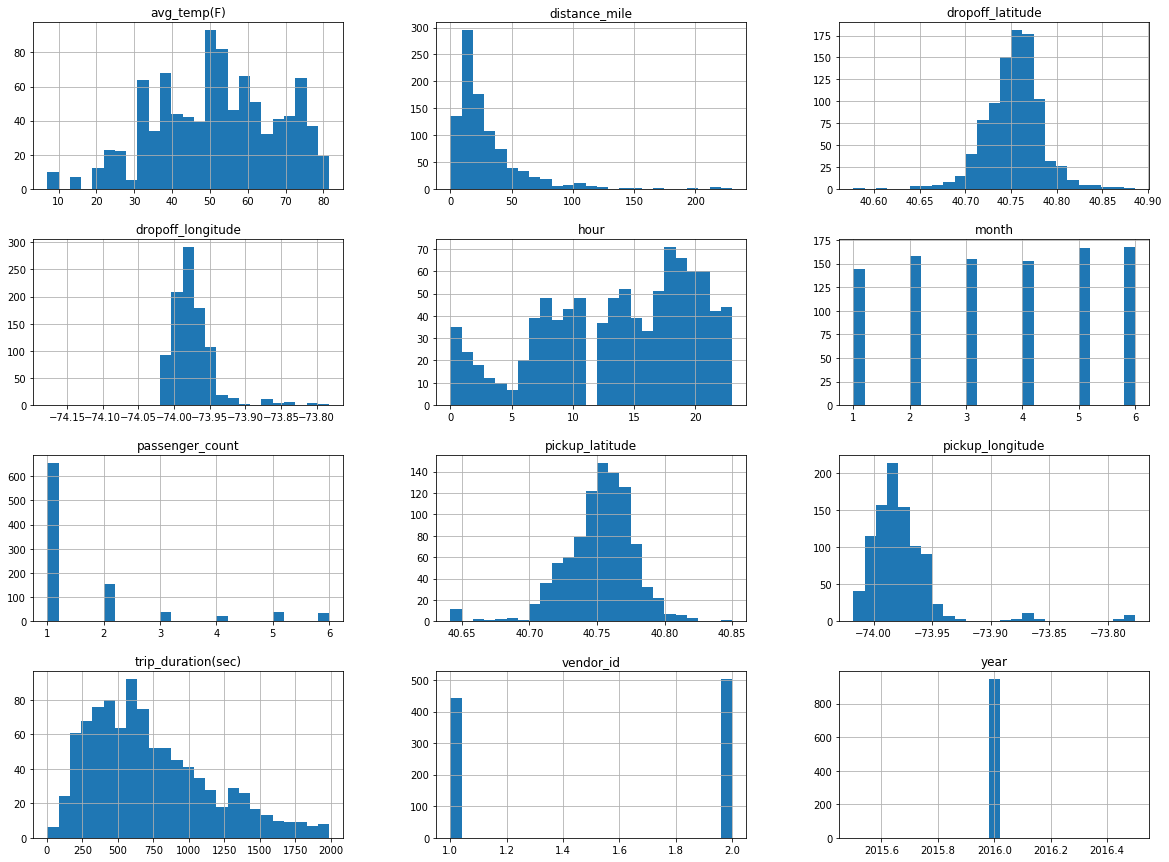

In [8]:
df.hist(bins = 25, figsize = (20,15))
plt.show()

In [9]:
#separate data in columns: pickup_datetime, dropoff_datetime, 
#change col trip_duration from seconds to minutes
#change col avg_temp from fahrenheit to celsius by this formula: (F-32)*(5/9)

In [10]:
#looking for missing values- "T"
df_snowFall_T = df[df.snow_fall == 'T']
df_snowD_T = df[df['snow_depth(inch)']=='T']
df_prec_T= df[df['precipitate']=='T']

df=df[df.snow_fall!='T']
df=df[df['snow_depth(inch)']!='T']
df=df[df['precipitate']!='T']

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 944
Data columns (total 20 columns):
year                  810 non-null int64
month                 810 non-null int64
date                  810 non-null object
hour                  810 non-null int64
id                    810 non-null object
vendor_id             810 non-null int64
pickup_datetime       810 non-null object
dropoff_datetime      810 non-null object
passenger_count       810 non-null int64
pickup_longitude      810 non-null float64
pickup_latitude       810 non-null float64
dropoff_longitude     810 non-null float64
dropoff_latitude      810 non-null float64
store_and_fwd_flag    810 non-null object
trip_duration(sec)    810 non-null int64
avg_temp(F)           810 non-null float64
snow_depth(inch)      810 non-null object
snow_fall             810 non-null object
precipitate           810 non-null object
distance_mile         810 non-null float64
dtypes: float64(6), int64(6), object(8)
memory usage: 1

In [20]:
#dropping all categorical columns

df['snow_depth(inch)']=pd.to_numeric(df['snow_depth(inch)'])
df['snow_fall']=pd.to_numeric(df['snow_fall'])
df['precipitate']=pd.to_numeric(df['precipitate'])
df.store_and_fwd_flag.astype('category')

df=df.drop(columns=['store_and_fwd_flag','date','id','pickup_datetime','dropoff_datetime'], axis = 1)
################## df['date'] = df['Date'].dt.day ######################################
df.info()
df.head()

AttributeError: 'DataFrame' object has no attribute 'store_and_fwd_flag'

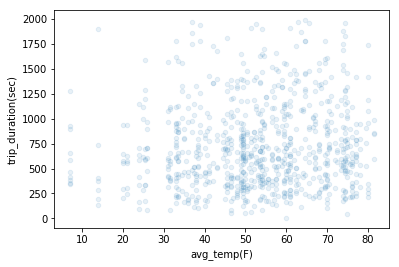

In [12]:
df.plot(kind="scatter", x="avg_temp(F)", y="trip_duration(sec)", alpha=0.1)

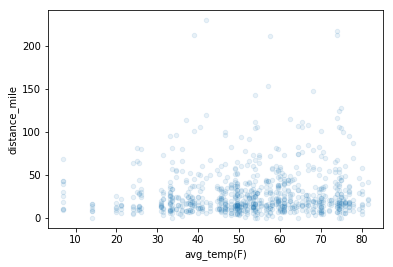

In [13]:
df.plot(kind="scatter", x="avg_temp(F)", y="distance_mile", alpha=0.1)

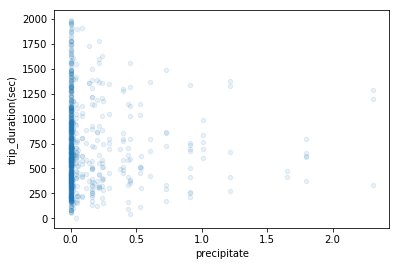

In [14]:
df.precipitate = pd.to_numeric(df['precipitate'], errors='coerce')
df.plot(kind="scatter", x="precipitate", y="trip_duration(sec)", alpha=0.1)

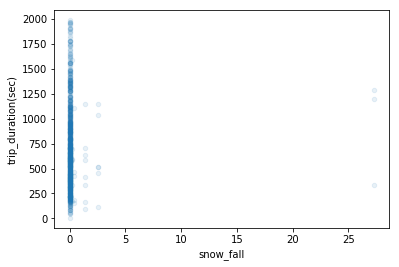

In [15]:
df.plot(kind="scatter", x="snow_fall", y="trip_duration(sec)", alpha=0.1)

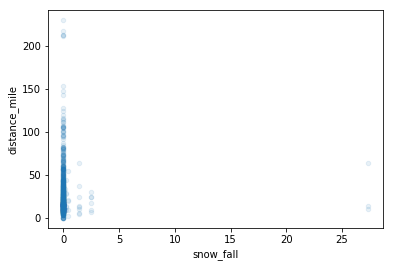

In [16]:
df.plot(kind="scatter", x="snow_fall", y="distance_mile", alpha=0.1)

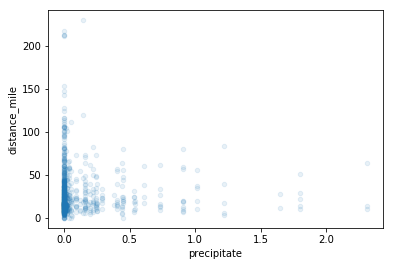

In [17]:
df.plot(kind="scatter", x="precipitate", y="distance_mile", alpha=0.1)

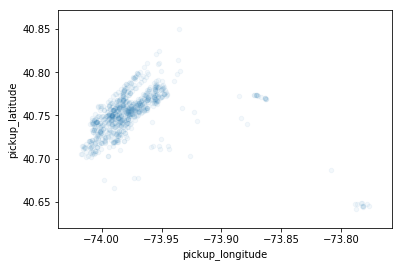

In [25]:
df.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", alpha=0.05)

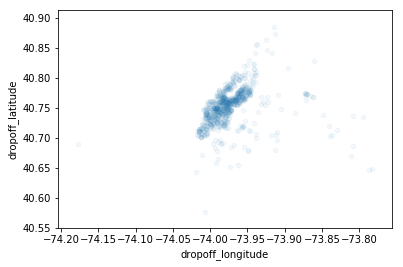

In [26]:
df.plot(kind="scatter", x="dropoff_longitude", y="dropoff_latitude", alpha=0.05)

In [21]:
df['distance_mile'].astype(float)
corr_matrix = df.corr()
corr_matrix["distance_mile"].sort_values(ascending=False)

distance_mile         1.000000
trip_duration(sec)    0.648400
pickup_longitude      0.386095
dropoff_longitude     0.243701
month                 0.103738
avg_temp(F)           0.088665
snow_depth(inch)     -0.003126
snow_fall            -0.006678
passenger_count      -0.018731
precipitate          -0.024053
vendor_id            -0.038683
hour                 -0.047054
dropoff_latitude     -0.073335
pickup_latitude      -0.212736
year                       NaN
Name: distance_mile, dtype: float64

In [ ]:
#Transform the data to matrix of X and y

# 1. Split between X the predictors and y the target
y = df['vendor_id']
X = df.drop('vendor_id', axis=1)

# 2. Turn from data frame to matrix: no indexes, number only
X = X.values  # X is a matrix of size 20 * 810
y = y.values  # y is a matrix of size 1 * 810, therefore it is a vector

# 3. Split X and y togather to train data set 80% and test data set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify = y) 

In [ ]:
print( 'df type is: ', type(df), '  and X_train type is: ', type(X_train))

In [ ]:
# select a model
tree_class = DecisionTreeClassifier()

In [ ]:
tree_class.fit(X_train, y_train)

In [ ]:
#Model evaluation
tree_class.score(X=X_test, y=y_test) 

In [ ]:
tree_class.score(X=X_train, y=y_train) 

In [ ]:
#Predict / Deploy model
example = X_test[7:10,]
example

In [ ]:
predicted_y = tree_class.predict(X=example)
predicted_y

In [ ]:
y_test[7:10,]